In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

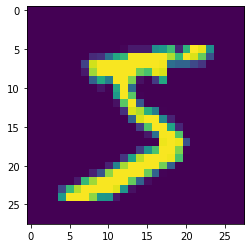

In [6]:
plt.imshow(single_image)

In [7]:
# mnist data is grayscale, the above is using a defualt matplotlib color mapping viridis (0-violet, 1-yellow)

In [8]:
# values go from 0 - 255

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# one hot encodeing
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [34]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [35]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

In [18]:
x_train = x_train/255

In [19]:
x_test = x_test/255

In [20]:
scaled_image = x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
scaled_image.max()

1.0

In [22]:
# above image will remain same as the ratio will remain same

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
# batch_size, width, height, color channels
x_train = x_train.reshape(60000,28,28,1)

In [25]:
x_test = x_test.reshape(10000,28,28,1)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
# apply valid padding when decimal number 28/4 because its needed , here it isn't needed

In [29]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [36]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1370 - accuracy: 0.9595 - val_loss: 0.0586 - val_accuracy: 0.9812
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0400 - val_accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0459 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0479 - val_accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0381 - val_accuracy: 0.9885


In [37]:
model.metrics_names

['loss', 'accuracy']

In [40]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.137028,0.959467,0.058625,0.9812
1,0.046787,0.985567,0.040028,0.9863
2,0.029611,0.990583,0.045907,0.9837
3,0.020021,0.993850,0.035016,0.9887
4,0.014266,0.995417,0.047894,0.9852
5,0.009470,0.996817,0.038141,0.9885


<AxesSubplot:>

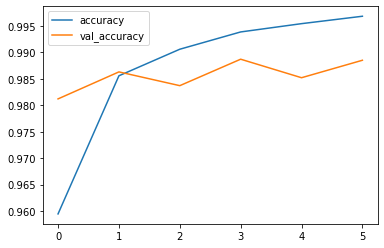

In [41]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

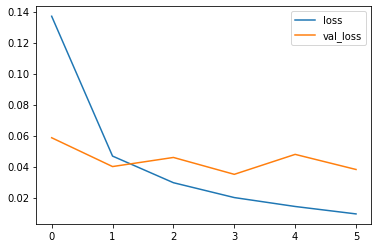

In [42]:
metrics[['loss','val_loss']].plot()

In [43]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.038141392171382904, 0.9884999990463257]


In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
predictions = model(x_test)

In [47]:
y_cat_test.shape

(10000, 10)

In [48]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Using (model.predict(X_test) > 0.5).astype("int32") is correct, since it convert the probability of the single output to class 1 or 0. This will work for binary class (one-class) output which is our problem here.

If you have multi-class output (more than 2 output class) then you will need to use the argmax instead, (np.argmax(model.predict(scaled_X_test), axis=-1))

In [64]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 5ms/step


In [65]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [67]:
confusion_matrix(y_test,predictions)

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1134,    1,    0,    0,    0,    0,    0,    0,    0],
       [   1,    3, 1015,    1,    0,    0,    1,    9,    2,    0],
       [   0,    0,    4,  994,    0,    6,    0,    2,    2,    2],
       [   1,    0,    0,    0,  970,    0,    0,    0,    1,   10],
       [   2,    0,    0,    3,    0,  883,    0,    0,    1,    3],
       [   9,    3,    0,    0,    1,    2,  941,    0,    2,    0],
       [   0,    3,    4,    0,    0,    1,    0, 1018,    1,    1],
       [   3,    1,    2,    1,    0,    1,    0,    1,  963,    2],
       [   0,    3,    0,    0,    5,    3,    0,    6,    2,  990]],
      dtype=int64)

In [68]:
import seaborn as sns

<AxesSubplot:>

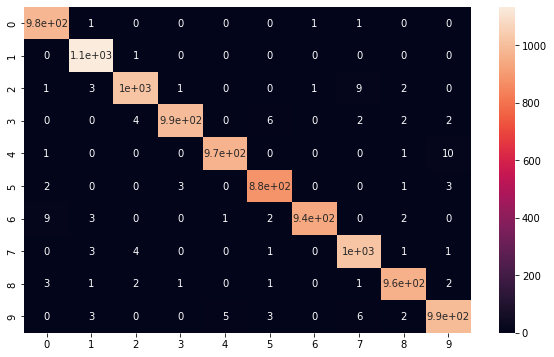

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

In [70]:
 # predicting a given image

In [71]:
my_number = x_test[0]

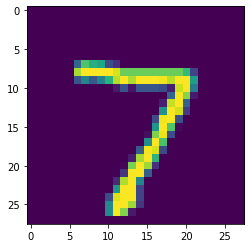

In [72]:
plt.imshow(my_number.reshape(28,28))

In [76]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

1/1 [==============================] - 0s 20ms/step


array([7], dtype=int64)